In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from itertools import cycle

sns.set(style='ticks')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
height = np.array([165.2, 175.9, 161.7, 174.2, 172.1, 163.3, 170.9, 170.6, 168.4, 171.3])
np.mean(height)

169.36

In [3]:
np.var(height, ddof=1)

21.667111111111122

In [4]:
np.random.normal(50, 10, 5)

array([53.40116841, 58.68792238, 65.187444  , 42.0677906 , 59.28730154])

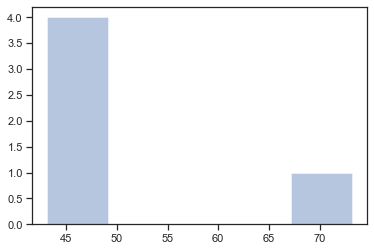

In [8]:
sample = np.random.normal(50, 10, 5)
sns.distplot(sample, bins=5, kde=False)
plt.show()

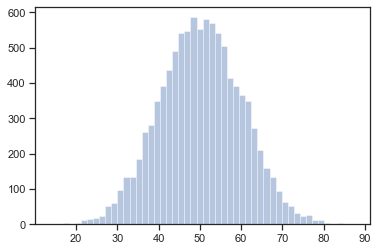

In [12]:
big_sample = np.random.normal(50, 10, 10000)
sns.distplot(big_sample, kde=False)
plt.show()

In [14]:
sample = np.random.normal(50, 10, 10)
print(np.mean(sample))

48.955952013263726


In [75]:
sample_mean_list = np.zeros((10000))

for i in range(10000):
    sample = np.random.normal(50, 10, 10)
    sample_mean_list[i] = np.mean(sample)

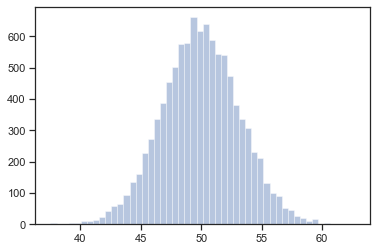

In [76]:
sns.distplot(sample_mean_list, kde=False)
plt.show()

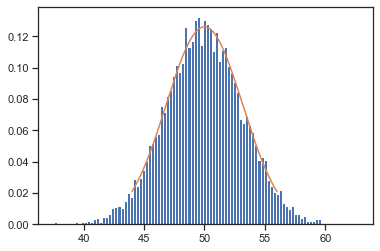

In [78]:
from scipy.stats import norm
#sns.distplot(sample_mean_list, kde=True)
plt.hist(sample_mean_list, bins=100, density=True)

x = np.linspace(44, 56, 10000)
plt.plot(x, norm.pdf(x, loc=50, scale=np.sqrt(10)))
plt.show()

In [23]:
sample_mean_list_under_five = np.where(np.abs(sample_mean_list-50) <= 5, 1, 0)

df = pd.Series(sample_mean_list_under_five)
df.value_counts()

1    8887
0    1113
dtype: int64

In [24]:
print(np.mean(sample_mean_list))
print(np.var(sample_mean_list))

49.968979827602986
10.015075408163444


標本分散と不偏分散の標本分布

In [26]:
sample_var_list = np.zeros(10000)
unbiased_var_list = np.zeros(10000)

for i in range(10000):
    sample = np.random.normal(50, 10, 10) # N(50, 10^2)からn=10の標本数を抽出
    sample_var_list[i] = np.var(sample)
    unbiased_var_list[i] = np.var(sample, ddof=1)

In [27]:
print(np.mean(sample_var_list))
print(np.mean(unbiased_var_list))

89.95313685788723
99.94792984209694


In [28]:
print(np.std(sample_var_list))
print(np.std(unbiased_var_list))

42.4502073608692
47.166897067632455


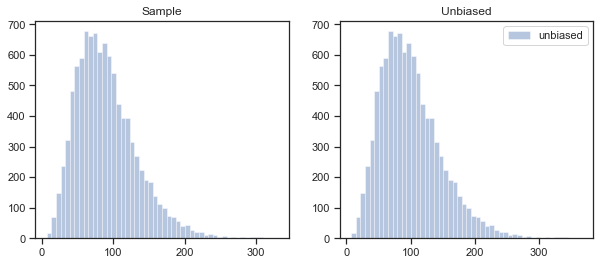

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.distplot(sample_var_list, kde=False, ax=axes[0], label='sample')
axes[0].set_title('Sample')
sns.distplot(unbiased_var_list, kde=False, ax=axes[1], label='unbiased')
axes[1].set_title('Unbiased')
# plt.legend()
plt.show()

In [43]:
sample_over_100 = np.where(sample_var_list>=200, 1, 0)
unbiased_over_100 = np.where(unbiased_var_list>=200, 1, 0)

In [44]:
df = pd.Series(sample_over_100)
print(df.value_counts())
df = pd.Series(unbiased_over_100)
print(df.value_counts())

0    9817
1     183
dtype: int64
0    9634
1     366
dtype: int64


In [45]:
print(np.mean(np.sqrt(unbiased_var_list)))

9.723458606884881


中央値

In [46]:
sample_mean_list = np.zeros(10000)
sample_median_list = np.zeros(10000)

for i in range(10000):
    sample = np.random.normal(50, 10, 10) # N(50, 10^2)からn=10の標本数を抽出
    sample_mean_list[i] = np.mean(sample)
    sample_median_list[i] = np.median(sample)

In [47]:
print(np.mean(sample_mean_list))
print(np.mean(sample_median_list))

50.03118527589216
50.0047050581744


In [48]:
print(np.std(sample_mean_list))
print(np.std(sample_median_list))

3.142602536110687
3.7054097939025303


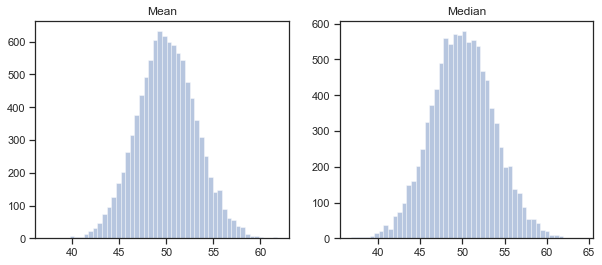

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.distplot(sample_mean_list, kde=False, ax=axes[0], label='sample')
axes[0].set_title('Mean')
sns.distplot(sample_median_list, kde=False, ax=axes[1], label='unbiased')
axes[1].set_title('Median')
plt.show()

# Practice

In [51]:
# 1
sample_mean_list = np.zeros(5000)
for i in range(5000):
    sample = np.random.normal(50, 10, 50)
    sample_mean_list[i] = np.mean(sample)

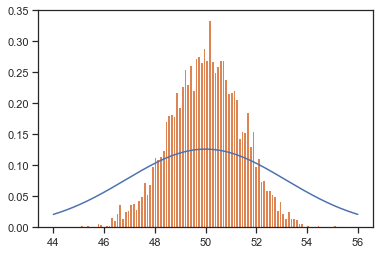

In [74]:
from scipy.stats import norm

x = np.linspace(44, 56, 10000)
plt.plot(x, norm.pdf(x, loc=50, scale=np.sqrt(10)))

#sns.distplot(sample_mean_list, kde=True)
plt.hist(sample_mean_list, bins=100, density=True)
plt.show()

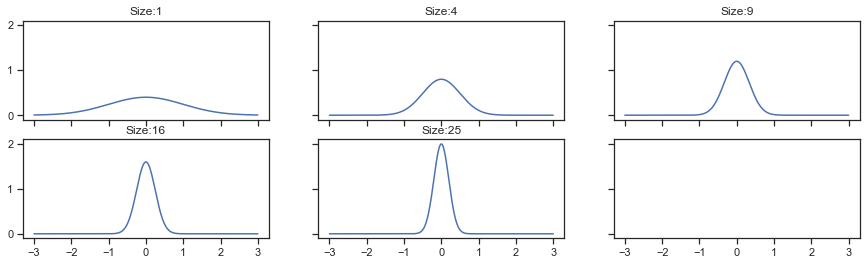

In [89]:
sample_size = [1, 4, 9, 16, 25]
fig, axes = plt.subplots(2, 3, figsize=(15,4), sharex=True, sharey=True)
axes = axes.flatten()

for i, size in enumerate(sample_size):
    x = np.linspace(-3, 3, 1000)
    axes[i].plot(x, norm.pdf(x, loc=0, scale=np.sqrt(1/size)))
    axes[i].set_title(f'Size:{size}')
plt.show()